In [14]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

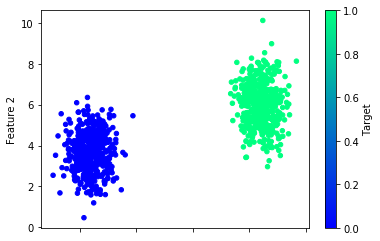

In [15]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
fig = df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [16]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [17]:
#Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [26]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 2ms/sample - loss: 0.8981 - accuracy: 0.5067
Epoch 2/100
750/750 [==============================] - 0s 83us/sample - loss: 0.8801 - accuracy: 0.5067
Epoch 3/100
750/750 [==============================] - 0s 68us/sample - loss: 0.8630 - accuracy: 0.5067
Epoch 4/100
750/750 [==============================] - 0s 62us/sample - loss: 0.8474 - accuracy: 0.5067
Epoch 5/100
750/750 [==============================] - 0s 68us/sample - loss: 0.8316 - accuracy: 0.5067
Epoch 6/100
750/750 [==============================] - 0s 69us/sample - loss: 0.8171 - accuracy: 0.5067
Epoch 7/100
750/750 [==============================] - 0s 64us/sample - loss: 0.8033 - accuracy: 0.5067
Epoch 8/100
750/750 [==============================] - 0s 64us/sample - loss: 0.7907 - accuracy: 0.5067
Epoch 9/100
750/750 [==============================] - 0s 64us/sample - loss: 0.7780 - accuracy: 0.5067
Epoch 10/100
750/750 [======================

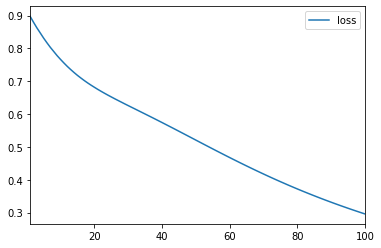

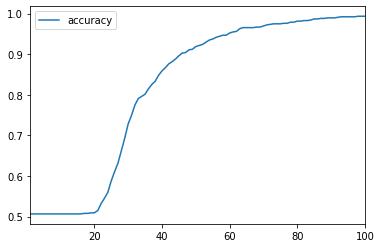

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
# Plot the accuracy
history_df.plot(y="accuracy")

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.2679 - accuracy: 0.9960
Loss: 0.2881811834573746, Accuracy: 0.9959999918937683


In [30]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

nn_model.predict_classes(new_X)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

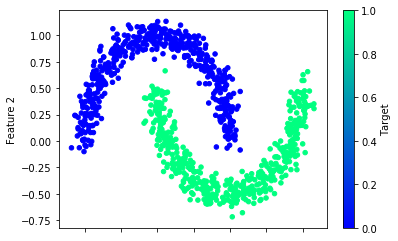

In [33]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [35]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [36]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 144us/sample - loss: 0.9177 - accuracy: 0.3160
Epoch 2/100
750/750 [==============================] - 0s 74us/sample - loss: 0.8969 - accuracy: 0.3253
Epoch 3/100
750/750 [==============================] - 0s 76us/sample - loss: 0.8753 - accuracy: 0.3387
Epoch 4/100
750/750 [==============================] - 0s 70us/sample - loss: 0.8551 - accuracy: 0.3467
Epoch 5/100
750/750 [==============================] - 0s 71us/sample - loss: 0.8373 - accuracy: 0.3520
Epoch 6/100
750/750 [==============================] - 0s 69us/sample - loss: 0.8199 - accuracy: 0.3653
Epoch 7/100
750/750 [==============================] - 0s 69us/sample - loss: 0.8046 - accuracy: 0.3707
Epoch 8/100
750/750 [==============================] - 0s 72us/sample - loss: 0.7899 - accuracy: 0.3813
Epoch 9/100
750/750 [==============================] - 0s 67us/sample - loss: 0.7762 - accuracy: 0.3867
Epoch 10/100
750/750 [====================

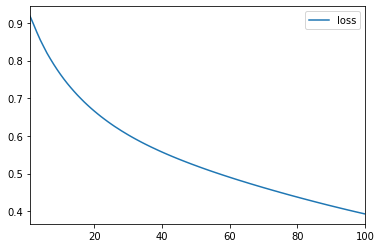

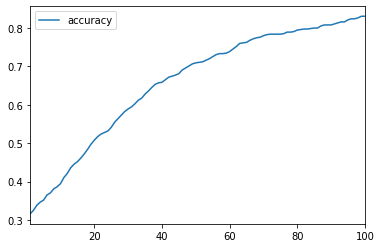

In [37]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
# Plot the loss
history_df.plot(y="accuracy")

In [38]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [39]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [40]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 2ms/sample - loss: 0.5670 - accuracy: 0.7720
Epoch 2/100
750/750 [==============================] - 0s 80us/sample - loss: 0.5300 - accuracy: 0.8067
Epoch 3/100
750/750 [==============================] - 0s 79us/sample - loss: 0.4989 - accuracy: 0.8440
Epoch 4/100
750/750 [==============================] - 0s 98us/sample - loss: 0.4715 - accuracy: 0.8560
Epoch 5/100
750/750 [==============================] - 0s 118us/sample - loss: 0.4474 - accuracy: 0.8667
Epoch 6/100
750/750 [==============================] - 0s 78us/sample - loss: 0.4261 - accuracy: 0.8667
Epoch 7/100
750/750 [==============================] - 0s 73us/sample - loss: 0.4071 - accuracy: 0.8760
Epoch 8/100
750/750 [==============================] - 0s 71us/sample - loss: 0.3899 - accuracy: 0.8787
Epoch 9/100
750/750 [==============================] - 0s 90us/sample - loss: 0.3748 - accuracy: 0.8800
Epoch 10/100
750/750 [=====================

750/750 [==============================] - 0s 77us/sample - loss: 0.1977 - accuracy: 0.9187
Epoch 79/100
750/750 [==============================] - 0s 81us/sample - loss: 0.1961 - accuracy: 0.9187
Epoch 80/100
750/750 [==============================] - 0s 71us/sample - loss: 0.1943 - accuracy: 0.9200
Epoch 81/100
750/750 [==============================] - 0s 70us/sample - loss: 0.1925 - accuracy: 0.9213
Epoch 82/100
750/750 [==============================] - 0s 70us/sample - loss: 0.1909 - accuracy: 0.9213
Epoch 83/100
750/750 [==============================] - 0s 74us/sample - loss: 0.1890 - accuracy: 0.9227
Epoch 84/100
750/750 [==============================] - 0s 82us/sample - loss: 0.1874 - accuracy: 0.9240
Epoch 85/100
750/750 [==============================] - 0s 78us/sample - loss: 0.1855 - accuracy: 0.9267
Epoch 86/100
750/750 [==============================] - 0s 71us/sample - loss: 0.1837 - accuracy: 0.9267
Epoch 87/100
750/750 [==============================] - 0s 78us/samp